✅ Successfully Merged Data for 5 Houses.


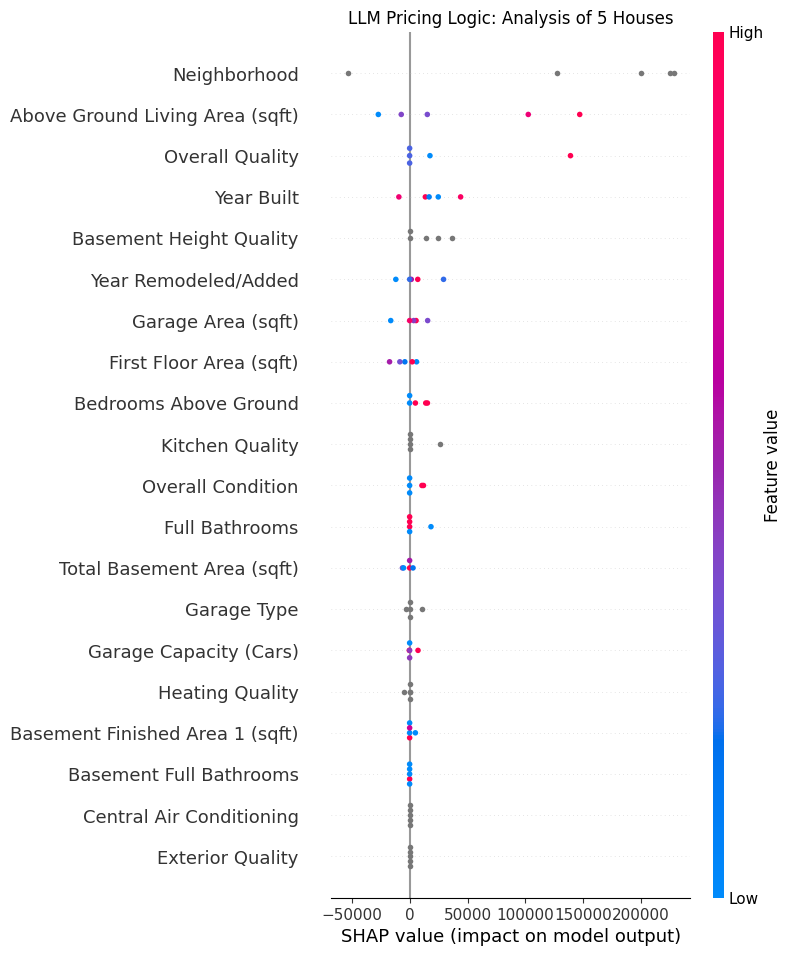

In [1]:
# Cell 7: Merge & Visualize All Results
import glob
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Load All CSVs (Inputs)
csv_files = glob.glob("shap_results/features_*.csv")
if not csv_files:
    raise ValueError("No result files found! Did you run Cell 6?")

all_features = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# 2. Load All SHAP Arrays (Outputs)
# We must ensure they load in the exact same order as the CSVs
npy_files = [f.replace("features_", "shap_values_").replace(".csv", ".npy") for f in csv_files]
all_shap_values = np.concatenate([np.load(f) for f in npy_files], axis=0)

print(f"✅ Successfully Merged Data for {len(all_features)} Houses.")

# 3. Generate the "Bee Swarm" Plot (Global Explainability)
plt.figure()
shap.summary_plot(all_shap_values, all_features, show=False)

# 4. Save High-Res Image for your B.Tech Report
plt.title(f"LLM Pricing Logic: Analysis of {len(all_features)} Houses")
plt.savefig("Final_SHAP_Analysis_Graph.png", bbox_inches='tight', dpi=300)
plt.show()

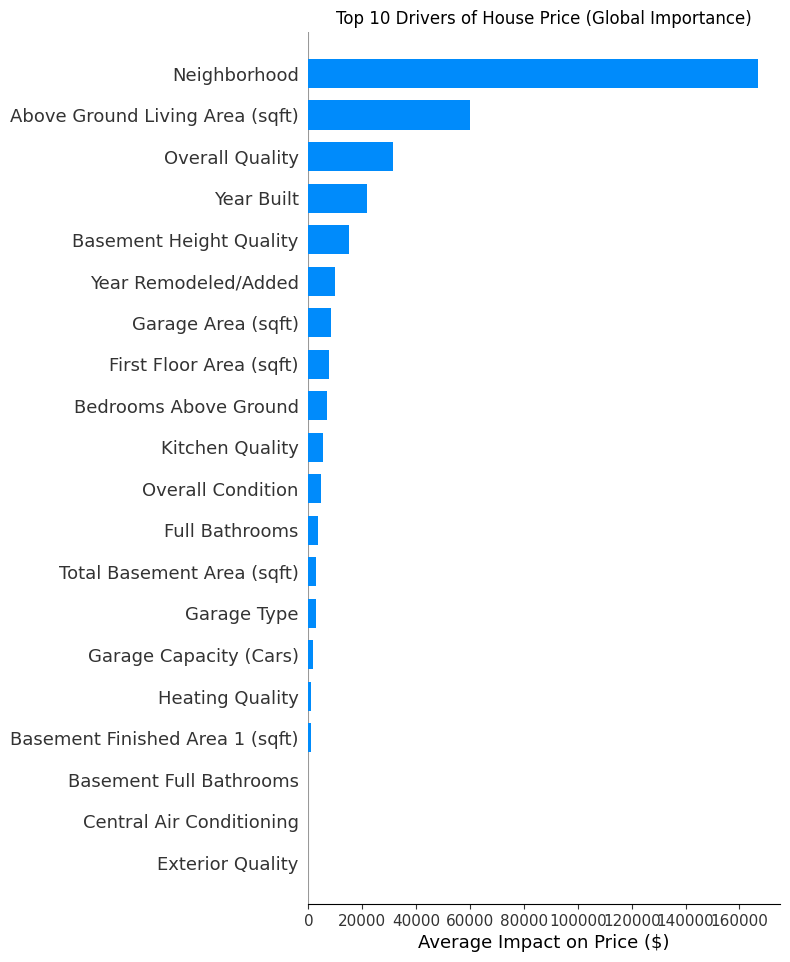

In [2]:
# Cell 8: Global Feature Importance (Bar Chart)
plt.figure()

# plot_type="bar" simplifies the bee swarm into a clean ranking
shap.summary_plot(all_shap_values, all_features, plot_type="bar", show=False)

plt.title("Top 10 Drivers of House Price (Global Importance)")
plt.xlabel("Average Impact on Price ($)")
plt.savefig("SHAP_Global_BarChart.png", bbox_inches='tight', dpi=300)
plt.show()

Generating Dependence Plot for top feature: Neighborhood


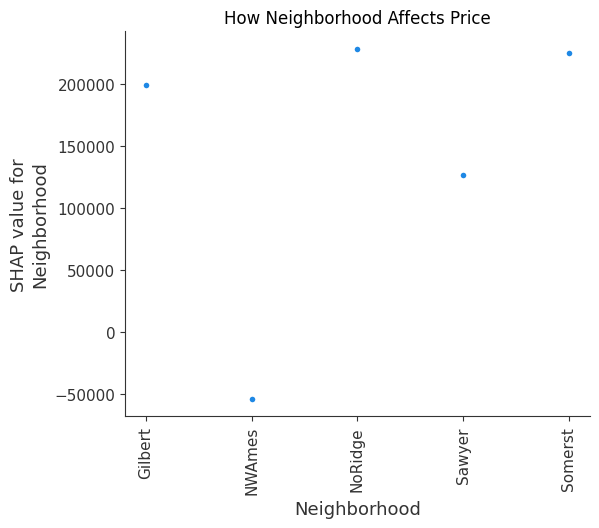

In [3]:
# Cell 9: Dependence Plot (Deep Dive into Top Feature)

# 1. Find the most important feature automatically
# (Sum of absolute SHAP values helps us find the winner)
feature_names = all_features.columns
top_feature_index = np.abs(all_shap_values).mean(0).argmax()
top_feature_name = feature_names[top_feature_index]

print(f"Generating Dependence Plot for top feature: {top_feature_name}")

# 2. Plot the relationship
# interaction_index=None removes the color coding for second feature (keeps it simple)
shap.dependence_plot(top_feature_name, all_shap_values, all_features, interaction_index=None, show=False)

plt.title(f"How {top_feature_name} Affects Price")
plt.savefig(f"SHAP_Dependence_{top_feature_name}.png", bbox_inches='tight', dpi=300)
plt.show()

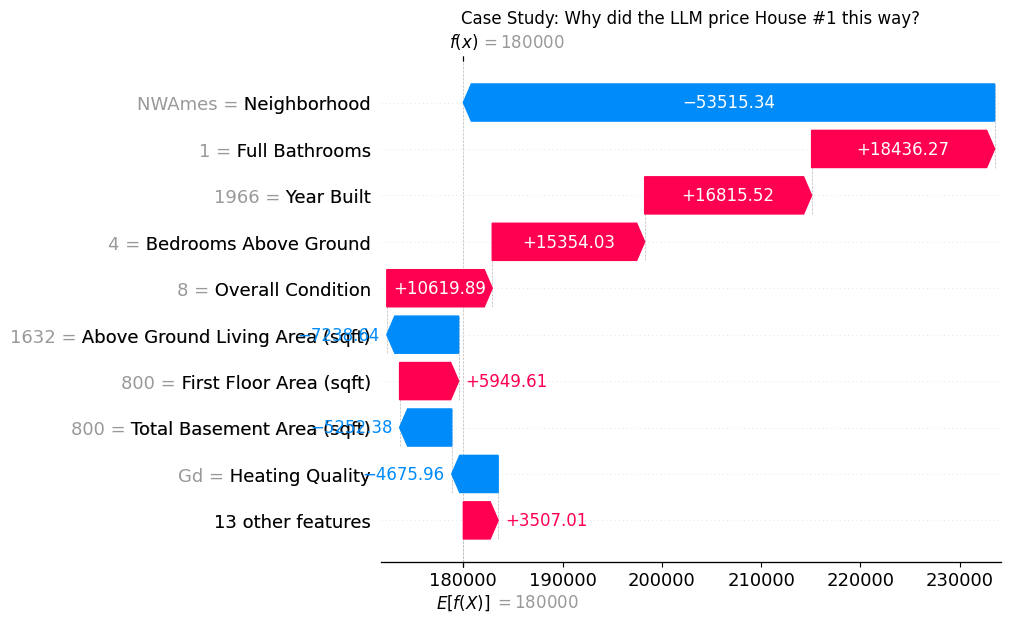

In [4]:
# Cell 10: Waterfall Plot (Case Study of House #1)

# 1. We need a "Base Value" (The average price of the dataset) to anchor the waterfall.
# If you don't have the original explainer, we can estimate it from the samples.
# (Or ideally, hardcode the average sale price of Ames ~180,000 if known)
estimated_base_value = 180000 

# 2. Construct a SHAP Explanation Object manually
# This is required because 'shap.plots.waterfall' is picky about data types.
explanation = shap.Explanation(
    values=all_shap_values[0],          # SHAP values for the first house
    base_values=estimated_base_value,   # The starting point
    data=all_features.iloc[0].values,   # The actual feature values
    feature_names=all_features.columns  # Column names
)

# 3. Generate the Plot
plt.figure()
shap.plots.waterfall(explanation, show=False)

plt.title("Case Study: Why did the LLM price House #1 this way?")
plt.savefig("SHAP_Waterfall_CaseStudy.png", bbox_inches='tight', dpi=300)
plt.show()